##### Task Definition for Titanic Dataset

Dataset column definition:

1. **PassengerId**: Unique identifier for each passenger.
2. **Survived**: Indicates if the passenger survived (1) or not (0).
3. **Pclass**: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd).
4. **Name**: Full name of the passenger.
5. **Sex**: Gender of the passenger (male or female).
6. **Age**: Age of the passenger.
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard the Titanic.
9. **Ticket**: Ticket number.
10. **Fare**: Amount of money paid for the ticket.
11. **Cabin**: Cabin number where the passenger stayed.
12. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Your task is to predict whether a passenger survived (1) or did not survive (0) based on the other features that are provided.

##### 1. Load the dataset and explore its values

- Load the Titanic dataset.
- Use methods like `info()`, `describe()`, and others to explore the dataset's structure, summary statistics, and check for missing values.

##### 2. Divide the data into features and class label

- Separate the dataset into features (X) and the target variable (y).

##### 3. Separate the dataset using the holdout method

- Split the data into 75% training and 25% test sets.
- Use `random_state=42` for reproducibility.
- Ensure stratification to maintain class distribution in both training and test sets.

##### 4. Preprocess the data

- Preprocess the features using `MinMaxScaler`(for numerical features) and `LabelEncoder`(for categorical features).

##### 5. Baseline prediction

- Make a baseline prediction by predicting all new instances to have class 0.
- Measure and record the accuracy of this baseline prediction.

##### 6. Train multiple different models using different classifiers

- Train a Decision Tree classifier with varying `max_depth` (e.g., 3, 5, 7, 12, 15) and `criterion` (e.g., entropy, gini).
- Train a K-Nearest Neighbors (KNN) classifier with different `n_neighbors` (e.g., 1-31) and distance metrics (e.g., Manhattan, Euclidean).

##### 7. Compute the accuracy score for each ML model

- Measure the accuracy of each trained model on the test set.

##### 8. Visualize the decision tree for the decision tree with the best performance

- Use the capabilities of decision tree to visualize it for the model with the best performance

##### 9. Optionally

- Add different techniques for validation like: Leave-One-Out Cross-Validation (LOOCV) and Cross validation (K-fold CV) and compare the results


In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
directory = "drive/MyDrive"

In [3]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install scikit-learn

In [46]:
df = pd.read_csv(os.path.join(directory, 'titanic.csv'))

In [47]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [52]:
#fill age grouped with the median
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

#fill missing cabins with unknown
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [53]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Cabin"]]

In [54]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin
0,3,male,22.0,1,0,Unknown
1,1,female,38.0,1,0,C85
2,3,female,26.0,0,0,Unknown
3,1,female,35.0,1,0,C123
4,3,male,35.0,0,0,Unknown
...,...,...,...,...,...,...
886,2,male,27.0,0,0,Unknown
887,1,female,19.0,0,0,B42
888,3,female,21.5,1,2,Unknown
889,1,male,26.0,0,0,C148


In [55]:
y = df["Survived"]

In [56]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify=y)

In [58]:
len(X_train)

668

In [59]:
len(X_test)

223

In [60]:
len(y_train)

668

In [61]:
len(y_test)

223

In [62]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Cabin
486,1,female,35.00,1,0,C93
238,2,male,19.00,0,0,Unknown
722,2,male,34.00,0,0,Unknown
184,3,female,4.00,0,2,Unknown
56,2,female,21.00,0,0,Unknown
...,...,...,...,...,...,...
547,2,male,30.00,0,0,Unknown
469,3,female,0.75,2,1,Unknown
736,3,female,48.00,1,3,Unknown
462,1,male,47.00,0,0,E63


In [63]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Cabin
157,3,male,30.0,0,0,Unknown
501,3,female,21.0,0,0,Unknown
352,3,male,15.0,1,1,Unknown
82,3,female,21.5,0,0,Unknown
683,3,male,14.0,5,2,Unknown
...,...,...,...,...,...,...
259,2,female,50.0,0,1,Unknown
91,3,male,20.0,0,0,Unknown
341,1,female,24.0,3,2,C23 C25 C27
115,3,male,21.0,0,0,Unknown


In [64]:
y_train

,Survived
486,1
238,0
722,0
184,1
56,1
...,...
547,1
469,1
736,0
462,0


In [65]:
y_test

,Survived
157,0
501,0
352,0
82,1
683,0
...,...
259,1
91,0
341,1
115,0


In [66]:
mms = MinMaxScaler()
le = LabelEncoder()

In [67]:
#apply scaler to numerical and encoder for categorical features
X_train_scaled = pd.DataFrame(mms.fit_transform(X_train[['Age', 'SibSp', 'Parch']]), columns=['Age', 'SibSp', 'Parch'])
X_test_scaled = pd.DataFrame(mms.transform(X_test[['Age', 'SibSp', 'Parch']]), columns=['Age', 'SibSp', 'Parch'])

X_train_scaled['Sex'] = le.fit_transform(X_train['Sex'])
X_test_scaled['Sex'] = le.transform(X_test['Sex'])

combined_cabin = pd.concat([X_train['Cabin'], X_test['Cabin']])
le.fit(combined_cabin)

X_train_scaled['Cabin'] = le.transform(X_train['Cabin'])
X_test_scaled['Cabin'] = le.transform(X_test['Cabin'])

In [68]:
x_baseline = [0]*len(X_test_scaled)
print(len(x_baseline))
print()

print('baseline acc:',round(accuracy_score(y_test, x_baseline),2))

223

baseline acc: 0.61


In [69]:
models = {}

#Decision Tree classifier
for max_depth in [3,5,7,12,15]:
    for criteria in ["entropy", "gini"]:
        model = DecisionTreeClassifier(criterion = criteria, max_depth = max_depth).fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
        models[model] = round(accuracy_score(y_test, predictions),4)

#KNN classifier
for k in list(range(1,31)):
    for metric in ["manhattan", "euclidean"]:
        model = KNeighborsClassifier(n_neighbors = k, metric = metric).fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
        models[model] = round(accuracy_score(y_test, predictions),4)

In [70]:
models

{DecisionTreeClassifier(criterion='entropy', max_depth=3): 0.7444,
 DecisionTreeClassifier(max_depth=3): 0.7444,
 DecisionTreeClassifier(criterion='entropy', max_depth=5): 0.7803,
 DecisionTreeClassifier(max_depth=5): 0.7713,
 DecisionTreeClassifier(criterion='entropy', max_depth=7): 0.7758,
 DecisionTreeClassifier(max_depth=7): 0.7713,
 DecisionTreeClassifier(criterion='entropy', max_depth=12): 0.7758,
 DecisionTreeClassifier(max_depth=12): 0.7713,
 DecisionTreeClassifier(criterion='entropy', max_depth=15): 0.7489,
 DecisionTreeClassifier(max_depth=15): 0.7623,
 KNeighborsClassifier(metric='manhattan', n_neighbors=1): 0.6637,
 KNeighborsClassifier(metric='euclidean', n_neighbors=1): 0.6592,
 KNeighborsClassifier(metric='manhattan', n_neighbors=2): 0.7085,
 KNeighborsClassifier(metric='euclidean', n_neighbors=2): 0.6996,
 KNeighborsClassifier(metric='manhattan', n_neighbors=3): 0.7309,
 KNeighborsClassifier(metric='euclidean', n_neighbors=3): 0.7354,
 KNeighborsClassifier(metric='manha

Best Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=5) with Accuracy: 0.7803


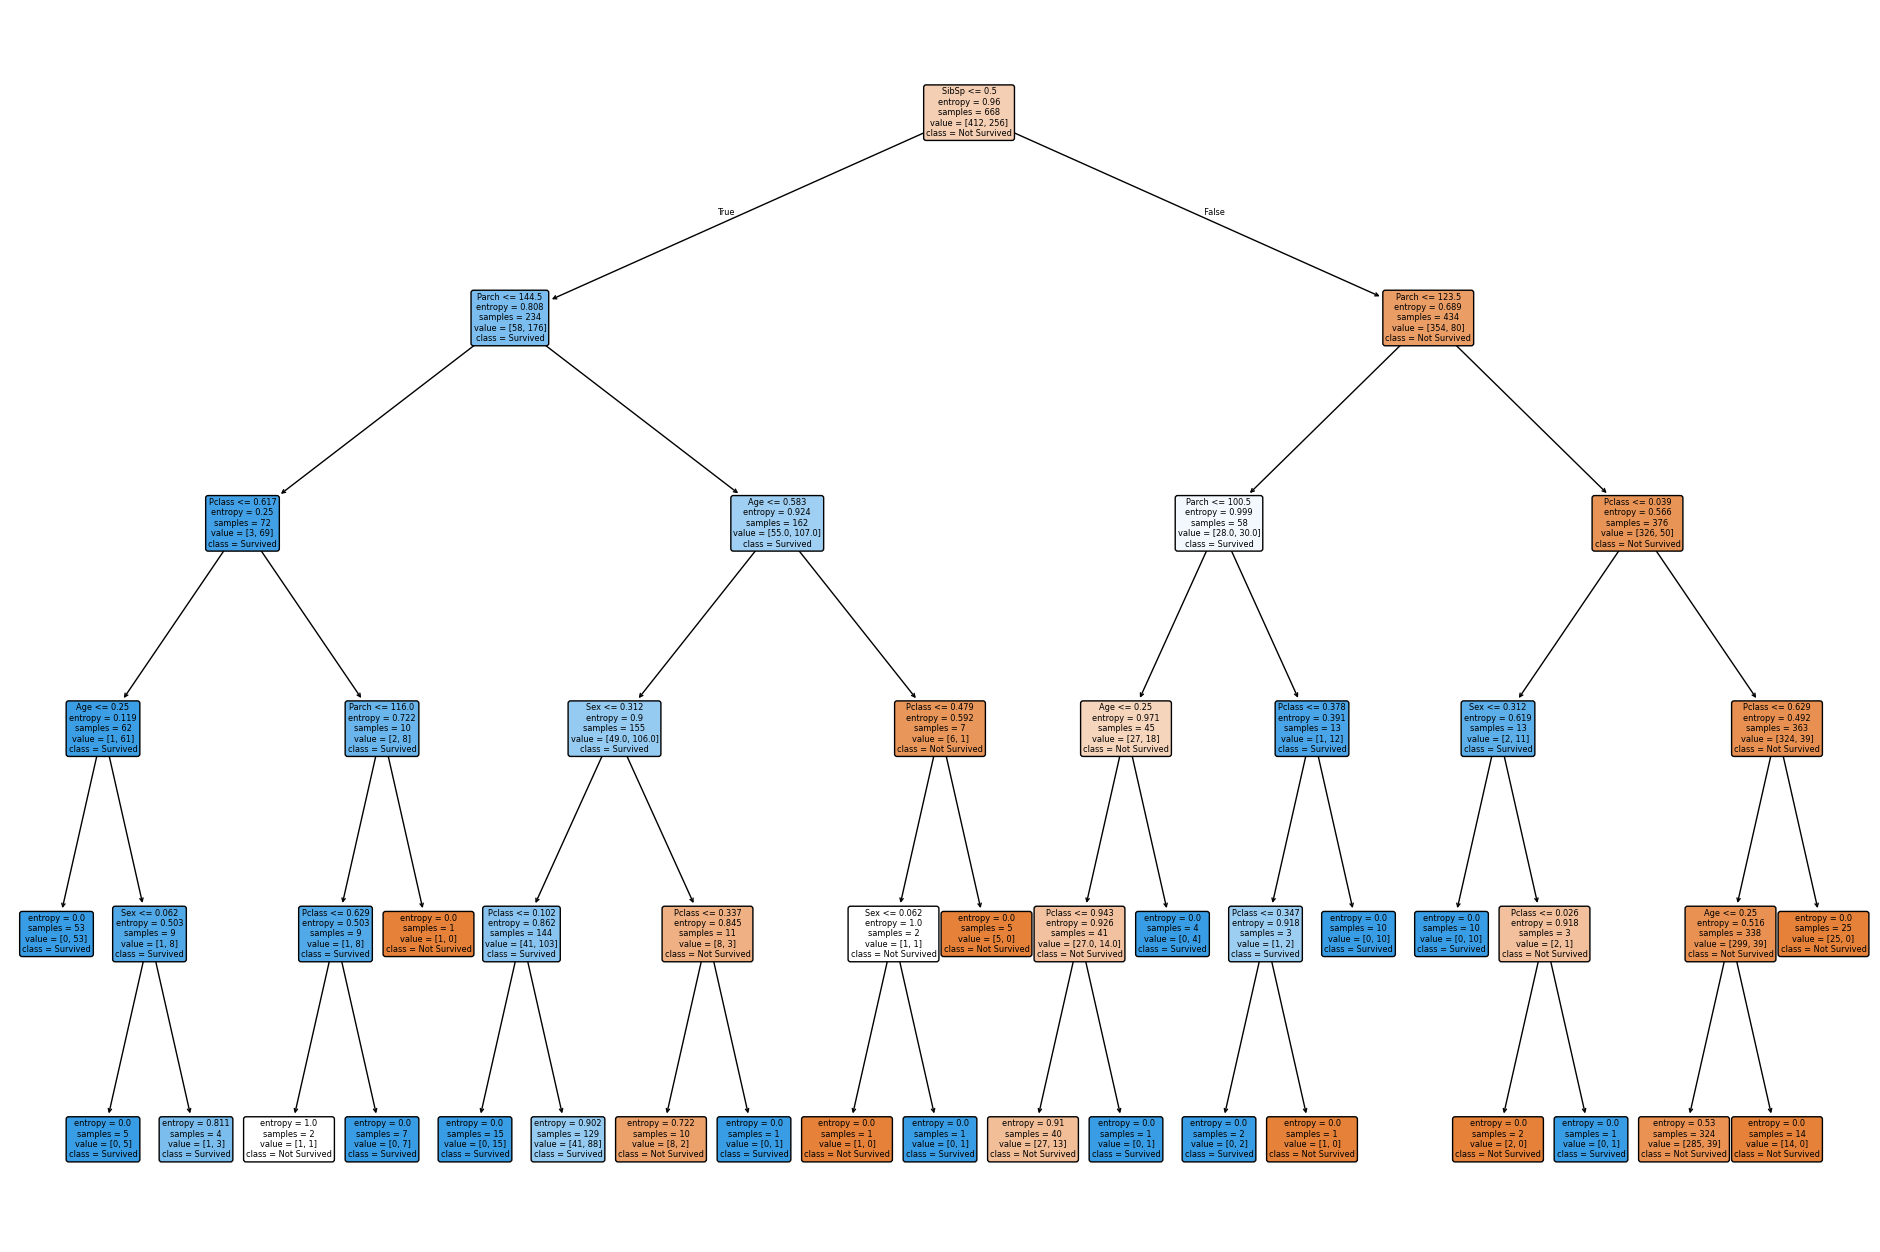

In [75]:
best_decision_tree = None
best_decision_tree_accuracy = 0

#iterate through the models to find the best decision tree model
for model in models:
    if isinstance(model, DecisionTreeClassifier):
        accuracy = models[model]
        if accuracy > best_decision_tree_accuracy:
            best_decision_tree_accuracy = accuracy
            best_decision_tree = model

print(f"Best Decision Tree Model: {best_decision_tree} with Accuracy: {best_decision_tree_accuracy:.4f}")

#plot the best decision tree
plt.figure(figsize=(24, 16))
plot_tree(best_decision_tree, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], rounded=True)
plt.show()

Optional

In [76]:
#Cross-Validation
for model in [DecisionTreeClassifier(), KNeighborsClassifier()]:
    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy").mean()
    print(f"Cross-Validation Accuracy for {model}: {accuracy:.4f}")

Cross-Validation Accuracy for DecisionTreeClassifier(): 0.7769
Cross-Validation Accuracy for KNeighborsClassifier(): 0.7889


In [77]:
#LOOCV
loocv = LeaveOneOut()
for model in [DecisionTreeClassifier(), KNeighborsClassifier()]:
    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=loocv, scoring="accuracy").mean()
    print(f"LOOCV Accuracy for {model}: {accuracy:.4f}")

LOOCV Accuracy for DecisionTreeClassifier(): 0.7844
LOOCV Accuracy for KNeighborsClassifier(): 0.7814
